In [5]:
#Descomentar las siguientes líneas para instalar gensim y smart_open
#conda install -c anaconda gensim
#conda install smart_open==2.0.0

### IMPORTANTE: antes de ejecutar la notebooks, descomprimir Data/Fake.rar y Data/True.rar

In [6]:
%run "Funciones.py"
%matplotlib inline

## Lectura de CSV

In [7]:
fake = pd.read_csv('Data/Fake.csv')
fake['label'] = 1
real = pd.read_csv('Data/True.csv')
real['label'] = 0

df = pd.concat([fake, real], axis=0)

# Exploración

In [8]:
total_entradas = len(df)

## Vemos si el dataset está balanceado:

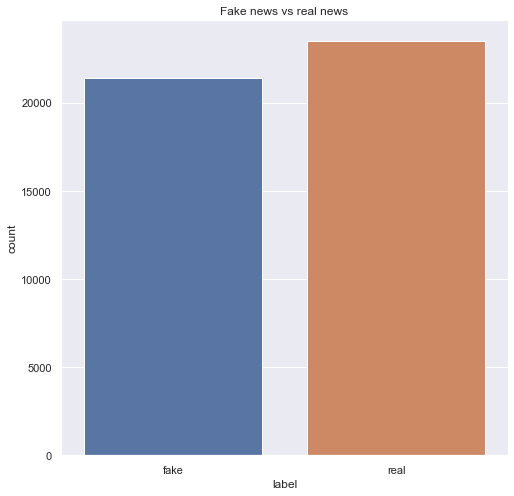

In [9]:
graficoBalanceado(df)

## Veamos si existen entradas duplicadas

## Entradas duplicadas por título

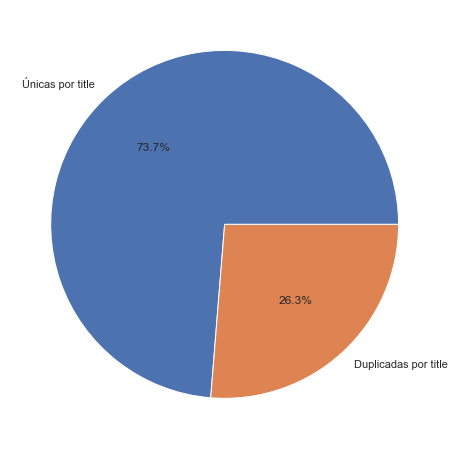

In [10]:
unique_q = df.groupby(["title", 'label']).filter(lambda x: len(x) == 1)
duplicate_q = df.groupby(["title", 'label']).filter(lambda x: len(x) > 1)

graficarPie(
    (len(unique_q)*100/total_entradas, len(duplicate_q)*100/total_entradas), 
    ['Únicas por title', 'Duplicadas por title'], 
    "%1.1f%%", 
    'Graficos/02_TitulosDuplicados');

## Entradas duplicadas por texto

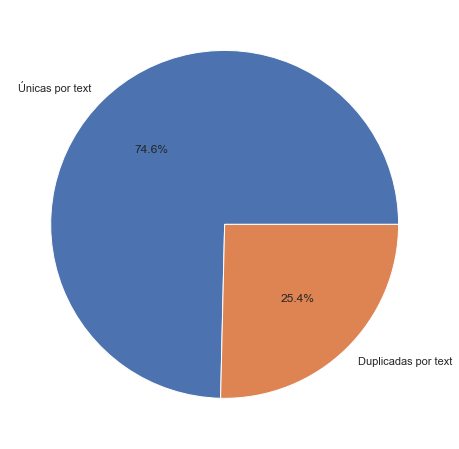

In [11]:
unique_q = df.groupby(["text", 'label']).filter(lambda x: len(x) == 1)
duplicate_q = df.groupby(["text", 'label']).filter(lambda x: len(x) > 1)
graficarPie(
    (len(unique_q)*100/total_entradas, len(duplicate_q)*100/total_entradas),
    ['Únicas por text', 'Duplicadas por text'],
    '%1.1f%%',
    'Graficos/03_TextosDuplicados');

## Entradas duplicadas por título y texto

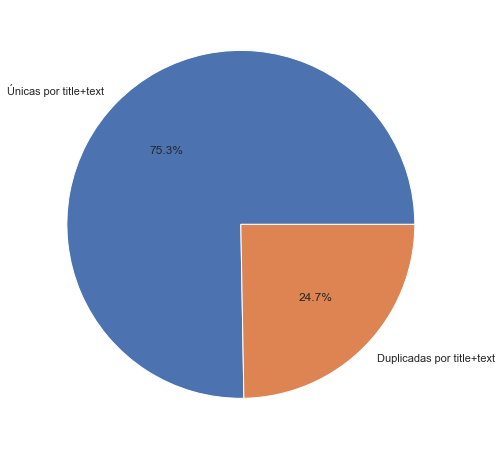

In [12]:
unique_q = df.groupby(['text', 'title', 'label']).filter(lambda x: len(x) == 1)
duplicate_q = df.groupby(['text', 'title', 'label']).filter(lambda x: len(x) > 1)
graficarPie(
    (len(unique_q)*100/total_entradas, len(duplicate_q)*100/total_entradas),
    ['Únicas por title+text', 'Duplicadas por title+text'],
    '%1.1f%%',
    'Graficos/04_TitulosTextosDuplicados');

## Veamos la distribución de caracteres y palabras

## Por titulo


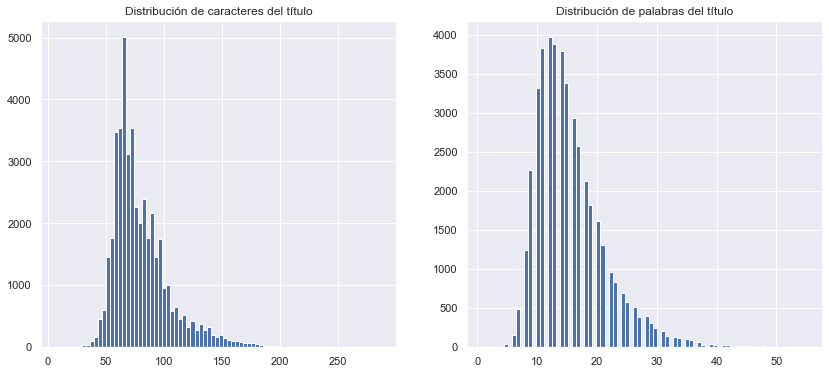

In [13]:
tokenizer = WordPunctTokenizer()

df['length'] = df['title'].apply(len)
df['length_tokens'] = df['title'].apply(lambda x : len(tokenizer.tokenize(x)))

fig, axes = matplotlib.pyplot.subplots(figsize=(14, 6), nrows=1, ncols=2)

df['length'].hist(bins=80, ax=axes[0]);
df['length_tokens'].hist(bins=80, ax=axes[1]);

axes[0].title.set_text('Distribución de caracteres del título');
axes[1].title.set_text('Distribución de palabras del título');

fig.savefig('Graficos/05_DistribucionCaracteresTitulo.png')

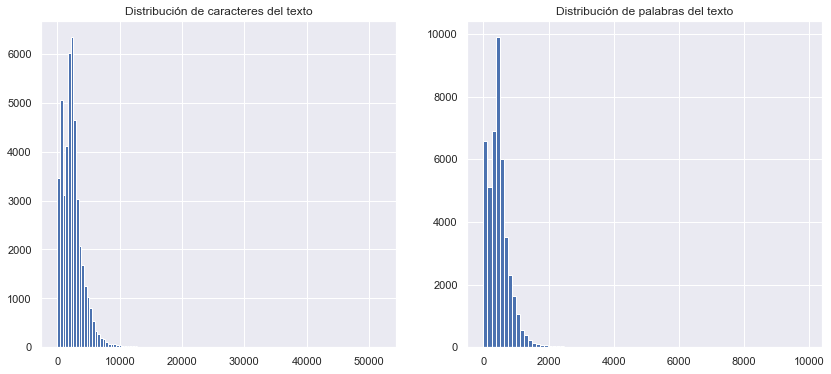

In [14]:
tokenizer = WordPunctTokenizer()

df['length'] = df['text'].apply(len)
df['length_tokens'] = df['text'].apply(lambda x : len(tokenizer.tokenize(x)))

fig, axes = matplotlib.pyplot.subplots(figsize=(14, 6), nrows=1, ncols=2)

df['length'].hist(bins=121, ax=axes[0]);
df['length_tokens'].hist(bins=80, ax=axes[1]);

axes[0].title.set_text('Distribución de caracteres del texto');
axes[1].title.set_text('Distribución de palabras del texto');

fig.savefig('Graficos/05_DistribucionCaracteresTexto.png')

## Palabras más frecuentes y menos frecuentes

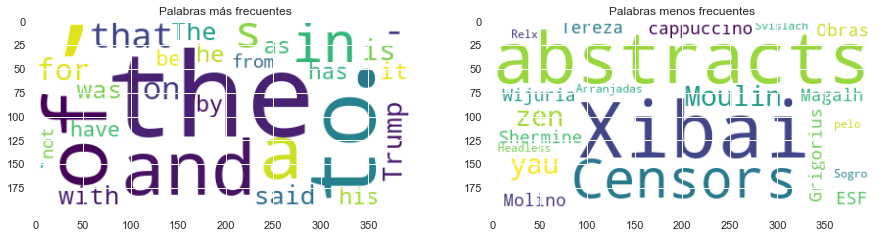

In [15]:
from wordcloud import WordCloud

from collections import Counter
df['texto'] = df['title'] + " " + df['text']
df['tokens'] = df['texto'].apply(lambda x : tokenizer.tokenize(x))
dic = Counter()

for tokens in df.tokens.values:
  dic.update(tokens)

def getWordcloud(data):
  return WordCloud(background_color ='white', min_font_size = 10).generate_from_frequencies(data)

wordcloud1 = getWordcloud(dict(dic.most_common(30)))
wordcloud2 = getWordcloud(dict(dic.most_common()[-30:]))

fig, axes = matplotlib.pyplot.subplots(figsize=(15, 15), nrows=1, ncols=2)
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[1].imshow(wordcloud2, interpolation='bilinear')

axes[0].title.set_text('Palabras más frecuentes')
axes[1].title.set_text('Palabras menos frecuentes')

fig.savefig('Graficos/06_WorldCount.png')

# Utilizar herramientas avanzadas para conocer la relación entre las palabras (palabras similares)

In [16]:
model_words = gensim.models.FastText(sentences=df.tokens.values, min_count=5, max_vocab_size=7000,size=32, workers=3, window=5, sg=1)

In [17]:
pd.DataFrame(model_words.wv.most_similar('trump', topn=5), columns=['Palabra', 'Relación'])

,Palabra,Relación
0,realDonaldTrump,0.804311
1,Trump,0.803240
2,Donald,0.790447
3,..,0.768238
4,definitely,0.724337


In [18]:
pd.DataFrame(model_words.wv.most_similar('FBI', topn=5), columns=['Palabra', 'Relación'])

,Palabra,Relación
0,Comey,0.927764
1,Mueller,0.861059
2,investigation,0.854557
3,Director,0.837357
4,probe,0.836206


In [19]:
pd.DataFrame(model_words.wv.most_similar('Reuters', topn=10), columns=['Palabra', 'Relación'])

,Palabra,Relación
0,),0.866582
1,(,0.844883
2,LONDON,0.801327
3,:,0.797930
4,/,0.790149
5,German,0.786144
6,BERLIN,0.783028
7,An,0.771655
8,Turkish,0.763799
9,Egyptian,0.753350


In [20]:
pd.DataFrame(model_words.wv.most_similar('news', topn=10), columns=['Palabra', 'Relación'])

,Palabra,Relación
0,daily,0.861665
1,conference,0.860076
2,agency,0.855963
3,site,0.838668
4,media,0.824601
5,Press,0.817938
6,network,0.817877
7,television,0.806493
8,reporting,0.803728
9,reports,0.784475


In [21]:
pd.DataFrame(model_words.wv.most_similar('breaking', topn=10), columns=['Palabra', 'Relación'])

,Palabra,Relación
0,putting,0.837884
1,set,0.836423
2,opened,0.831688
3,covering,0.816847
4,holding,0.815673
5,turning,0.810433
6,began,0.806362
7,closed,0.806037
8,broke,0.803995
9,hot,0.803238


## Palabras comunes usando un Counter()

In [22]:
from itertools import chain

splited = df['text'].str.split()
counter_words = Counter(list(chain(*splited)))
counter_frame = pd.DataFrame(data=counter_words, index=['count'])
top_common_words = counter_frame.T.sort_values(by=['count'], ascending=False).reset_index()
top_common_words.head(20)

,index,count
0,the,905825
1,to,529815
2,of,437532
3,and,392470
4,a,390084
5,in,322378
6,that,220928
7,on,181758
8,s,172259
9,for,166256


## Sobre otras columnas (subject)

In [23]:
df_subjects = df.groupby(['subject', 'label'])['text'].count()
df_subjects

subject          label
Government News  1         1570
Middle-east      1          778
News             1         9050
US_News          1          783
left-news        1         4459
politics         1         6841
politicsNews     0        11272
worldnews        0        10145
Name: text, dtype: int64

# Posibles conclusiones



*   El dataset está balanceado
*   Hay que eliminar stop words frecuentes
*   Hay que eliminar las palabras menos frecuentes
*   Los textos tienen como máximo 2000 palabras
*   Los títulos tienen como máximo 40 palabras
*   Subject divide exactamente en fake o real el dataset
*   Las palabras más frecuentes son stopwords